In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random
import re
import time
import sys
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import gensim.downloader as api
import gensim
from gensim.models import KeyedVectors
# from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import enchant
import joblib
import os
from imblearn.over_sampling import RandomOverSampler

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
df = pd.read_csv("datasets/2021-2022/2021-2022_multi_dataset9.csv")

In [25]:
def engagement(data, threshold):
    return data["like_count"] + data["retweet_count"] + data["quote_count"] + data["reply_count"]



In [26]:
df["engagement"] = df.apply(lambda x: engagement(x, 100), axis=1)

In [5]:
df["clean"].tolist()

['I thought saying such things is Harvard Prof recently boasted Jews Should Not Apologize For Being So Rich For Controlling The Media or Influencing Public Debate we have earned it Never Apologize For Using Your Strength',
 'Thread about Socialism with Chinese Characteristics and the undeniably socialist nature of the People s Republic of China',
 'Trump says something to Justice Kennedy that shocks him Something s up No sound',
 'Too many Americans treat Halloween not as spooky but as if it s the Purge for respect decency taste and manners',
 'I m thrilled to see the pass I 1000 this evening This is a historic moment which upholds the protections of in WA Our state is stronger when it is inclusive of all people and everyone has an equitable chance to participate',
 'WRONG The bill was passed by our national parliament will be signed by the president soon Democratic is a country in itself has nothing to do with authoritarian is a commie brainwasher it sucks JW',
 'DaysOfeVe TaoOfeVe Cu

In [6]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

nltk_stopwords = set(stopwords.words('english'))

words_to_filter = list(nltk_stopwords)

def get_top_words(text, n=50):
    text = " ".join(text)
    # Split the text into words
    words = text.split()
    words = [word.lower() for word in words if word.lower() not in words_to_filter]

    tagged_words = pos_tag(words)
    words = [word for word, pos in tagged_words if pos.startswith('N')]
    # Count the frequency of each word
    word_freq = Counter(words)
    # Get the top n most frequent words
    top_words = word_freq.most_common(n)
    return top_words

def plot_top_words(top_words, dataset_name):
    words, frequencies = zip(*top_words)
    plt.figure(figsize=(10, 5))
    plt.bar(words, frequencies, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title("Top Words In" + dataset_name)
    plt.xticks(rotation=45, ha='right')
    plt.show()


In [7]:
def plot_top_words_and_wordcloud(top_words, dataset_name):
    # Sort the top_words by frequency in descending order
    top_words = sorted(top_words, key=lambda x: x[1], reverse=True)
    
    words, frequencies = zip(*top_words)

    # Create a figure with 2 rows and 1 column
    plt.figure(figsize=(10, 10))

    # Plot Horizontal Bar Graph in the first row
    plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
    plt.barh(words, frequencies, color='skyblue')
    plt.ylabel('Words')
    plt.xlabel('Frequency')
    plt.title("Top Words In " + dataset_name)
    plt.gca().invert_yaxis()  # Invert y-axis to have the largest at the top

    # Generate Word Cloud
    word_freq_dict = dict(top_words)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

    # Plot Word Cloud in the second row
    plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of " + dataset_name)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

In [9]:
top_words_dataset = get_top_words(df["clean"].astype("str").tolist(), n=10)

In [13]:
words_temp, frequencies_temp = zip(*top_words_dataset)
words_to_filter2 = list(nltk_stopwords) + list(words_temp)

def get_top_words_int(text, n=50):
    text = " ".join(text)
    # Split the text into words
    words = text.split()
    words = [word.lower() for word in words if word.lower() not in words_to_filter2]

    tagged_words = pos_tag(words)
    words = [word for word, pos in tagged_words if pos.startswith('N')]
    # Count the frequency of each word
    word_freq = Counter(words)
    # Get the top n most frequent words
    top_words = word_freq.most_common(n)
    return top_words

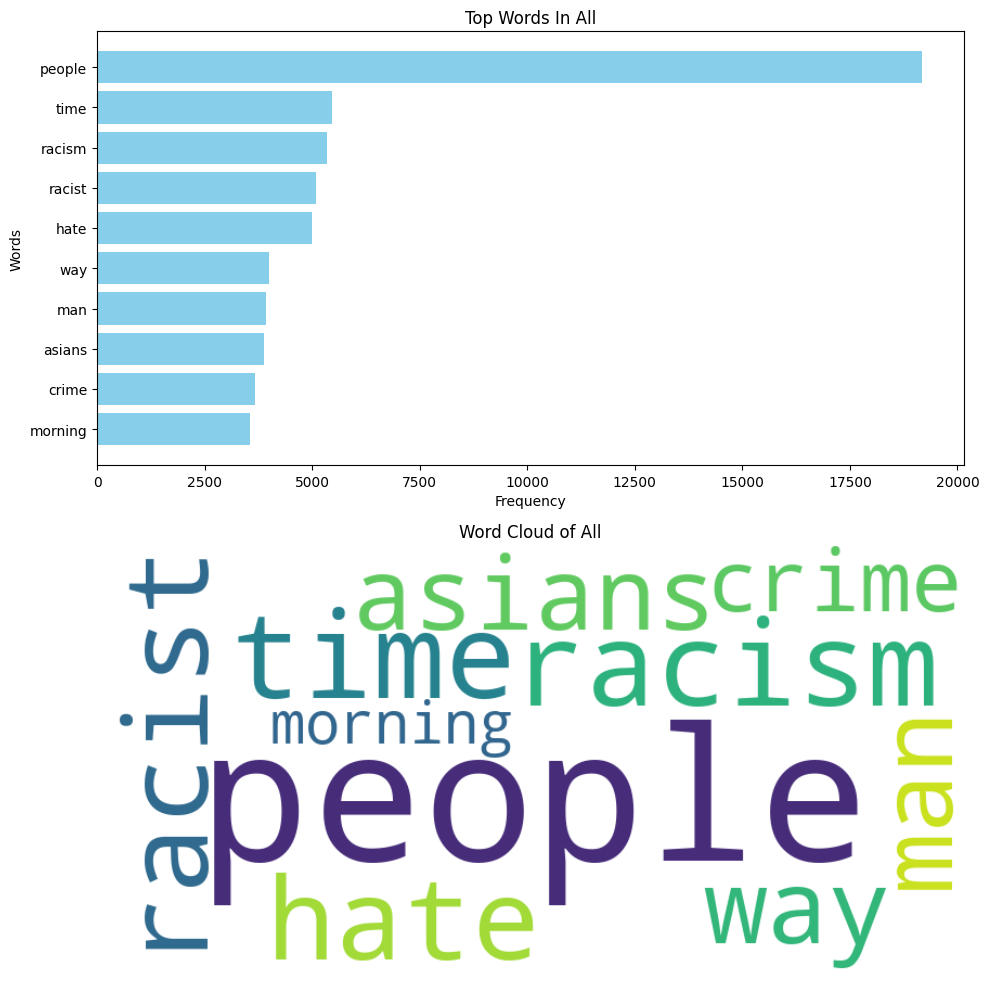

In [12]:
top_words = get_top_words(df["clean"].astype("str").tolist(), n=10)
plot_top_words_and_wordcloud(top_words, "All")

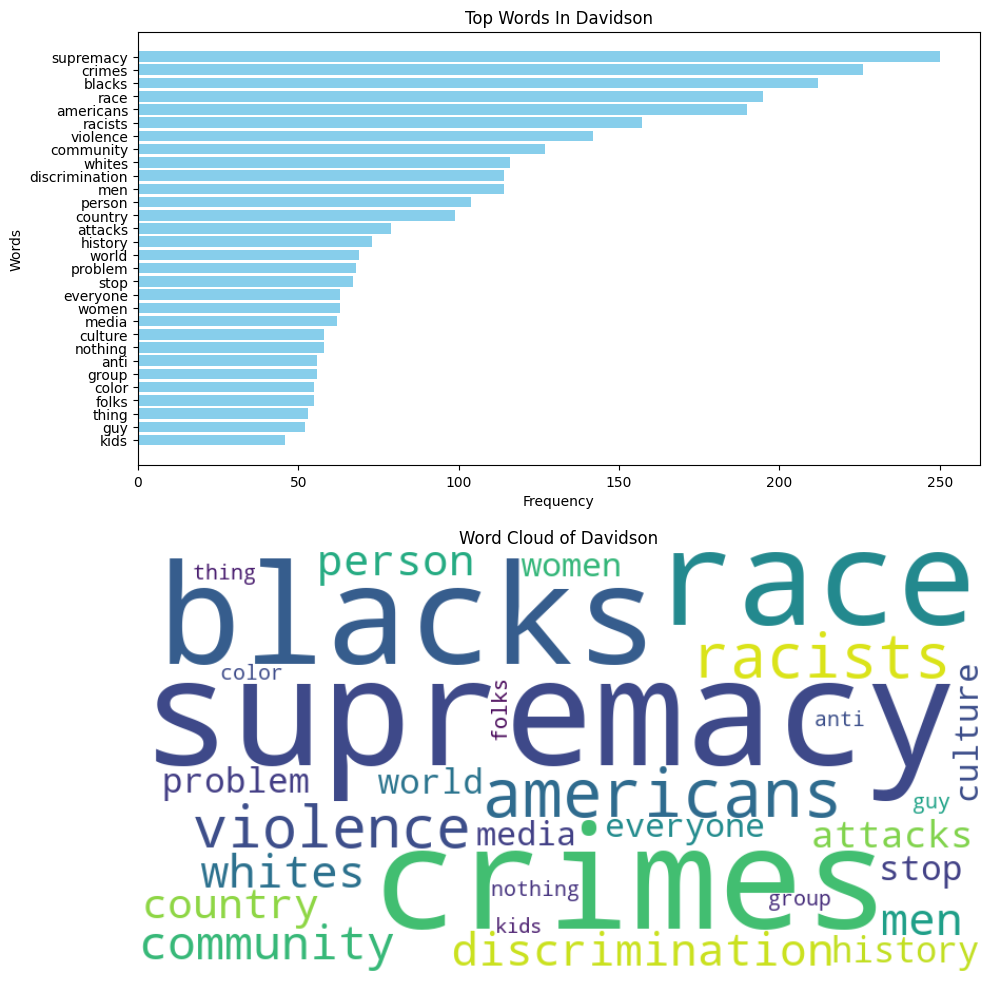

In [14]:
top_words = get_top_words_int(df[df["davidson"] > 0.5]["clean"].astype("str").tolist(), n=30)
plot_top_words_and_wordcloud(top_words, "Davidson")

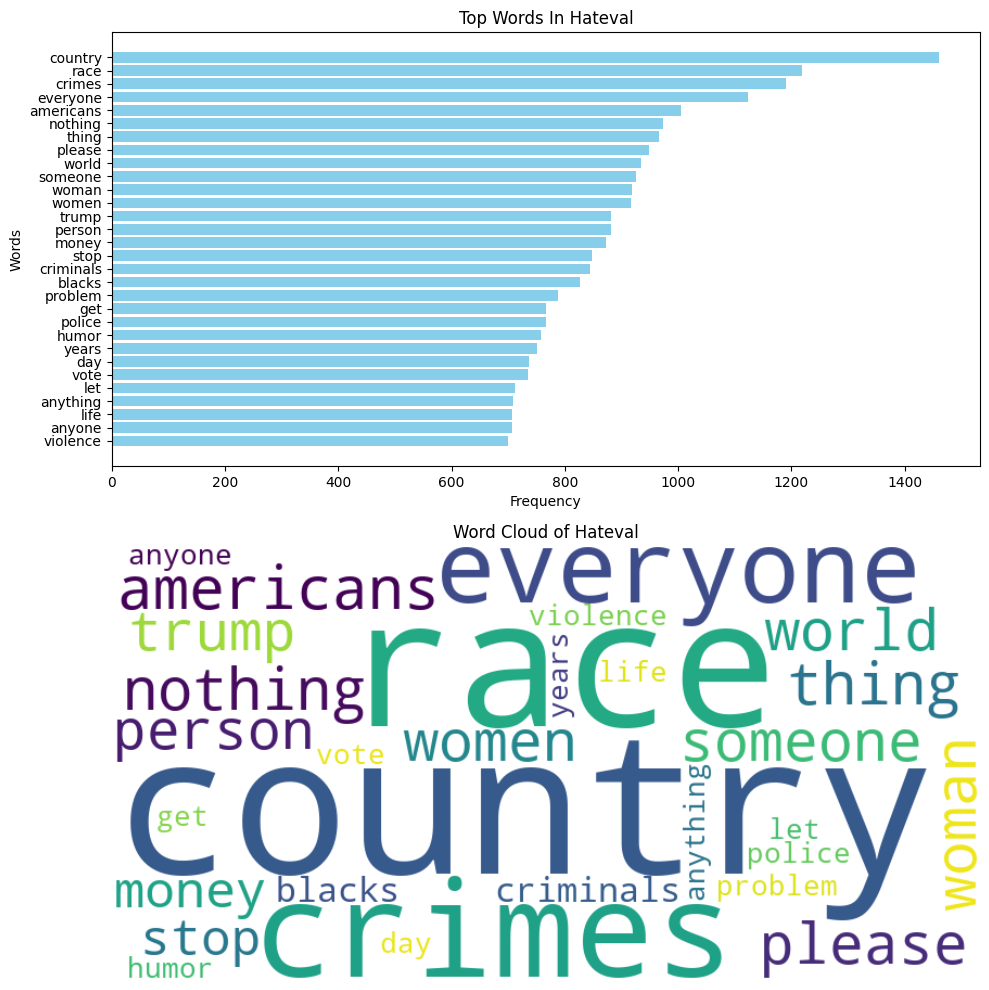

In [15]:
top_words = get_top_words_int(df[df["hateval"] > 0.5]["clean"].astype("str").tolist(), n=30)
plot_top_words_and_wordcloud(top_words, "Hateval")

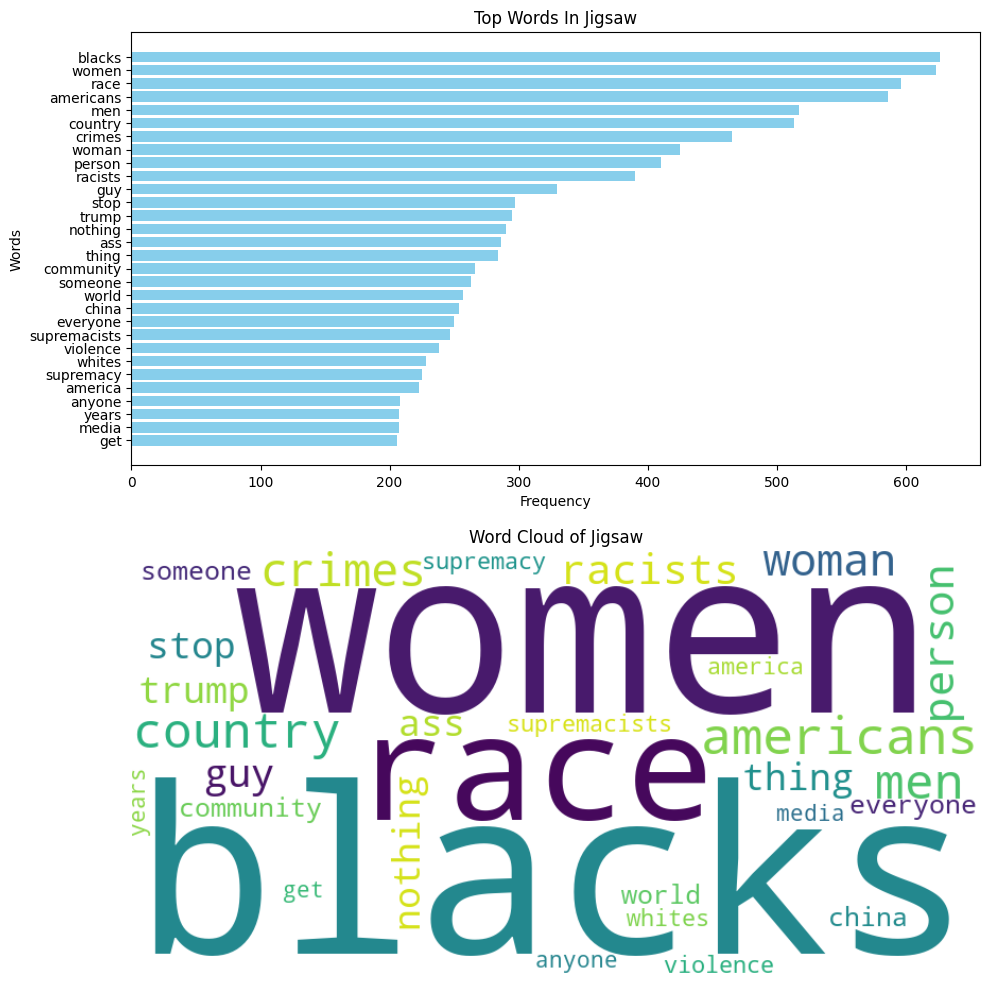

In [16]:
top_words = get_top_words_int(df[df["jigsaw"] > 0.5]["clean"].astype("str").tolist(), n=30)
plot_top_words_and_wordcloud(top_words, "Jigsaw")

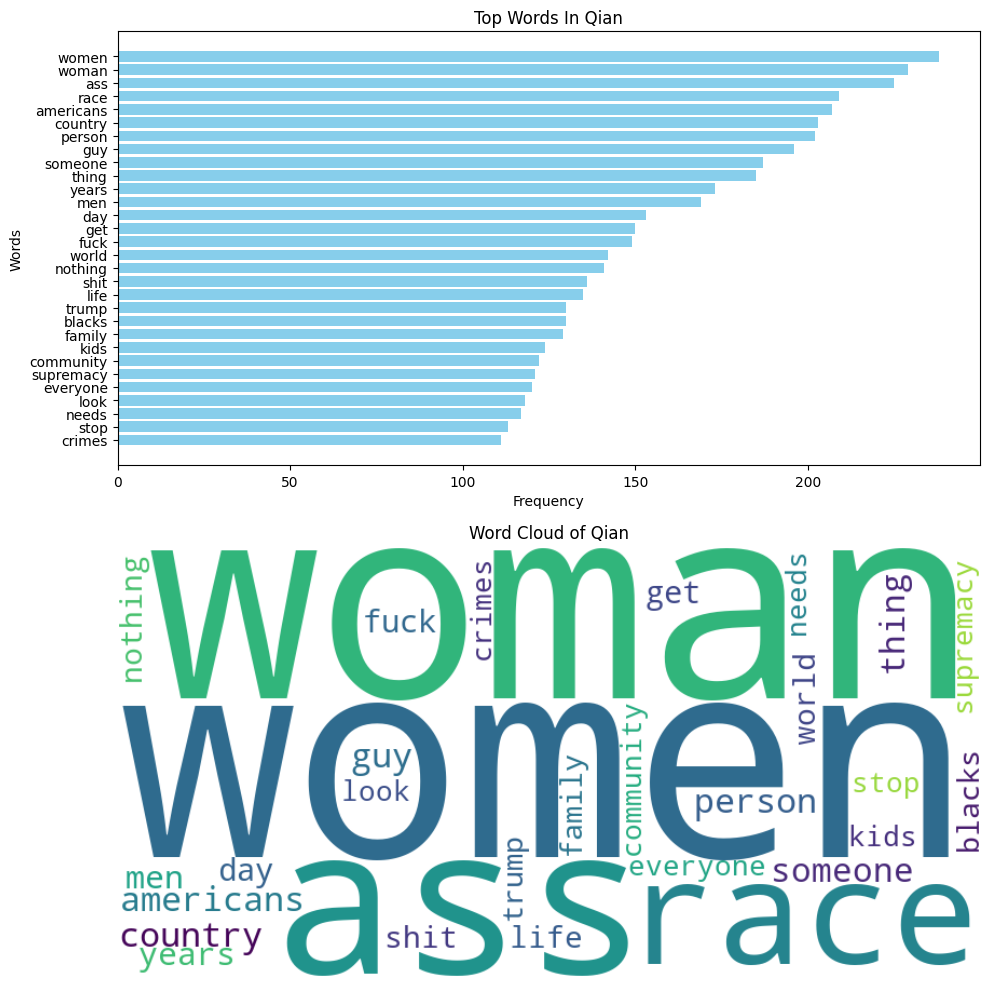

In [17]:
top_words = get_top_words_int(df[df["qian"] > 0.5]["clean"].astype("str").tolist(), n=30)
plot_top_words_and_wordcloud(top_words, "Qian")

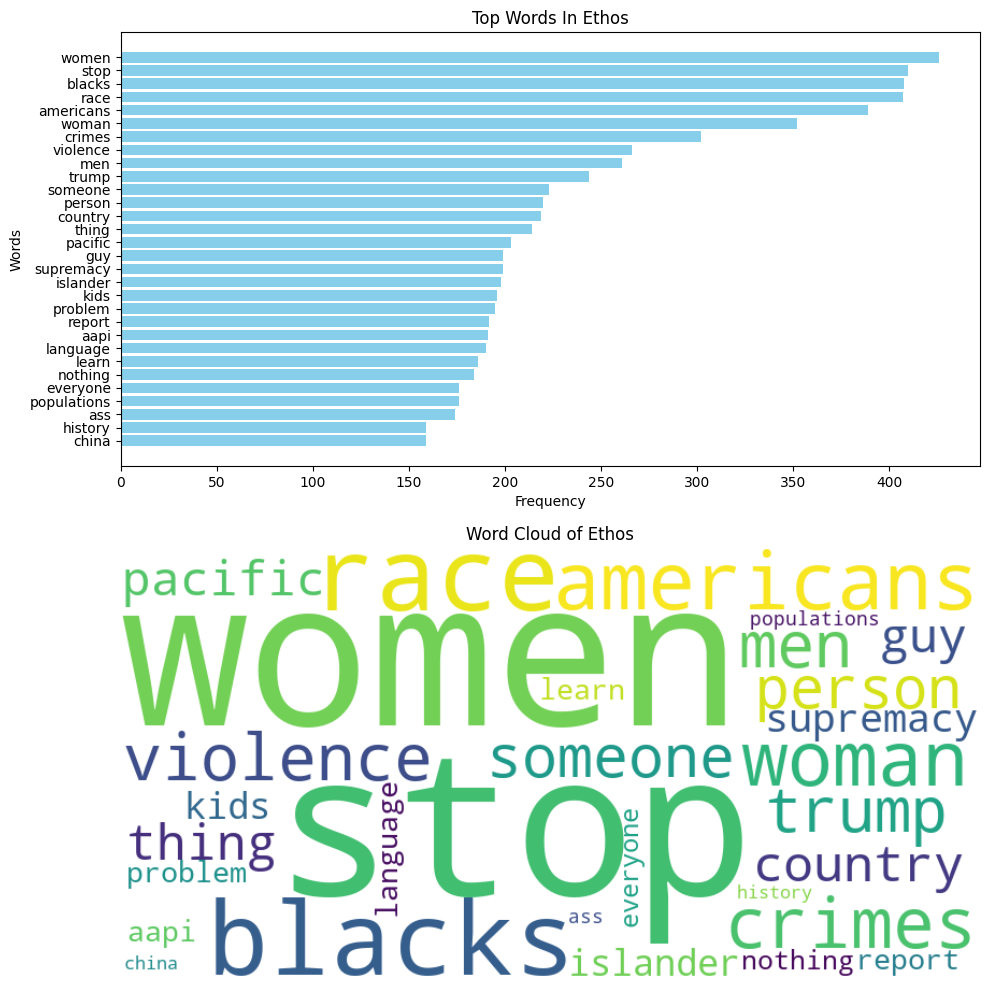

In [18]:
top_words = get_top_words_int(df[df["ethos"] > 0.5]["clean"].astype("str").tolist(), n=30)
plot_top_words_and_wordcloud(top_words, "Ethos")

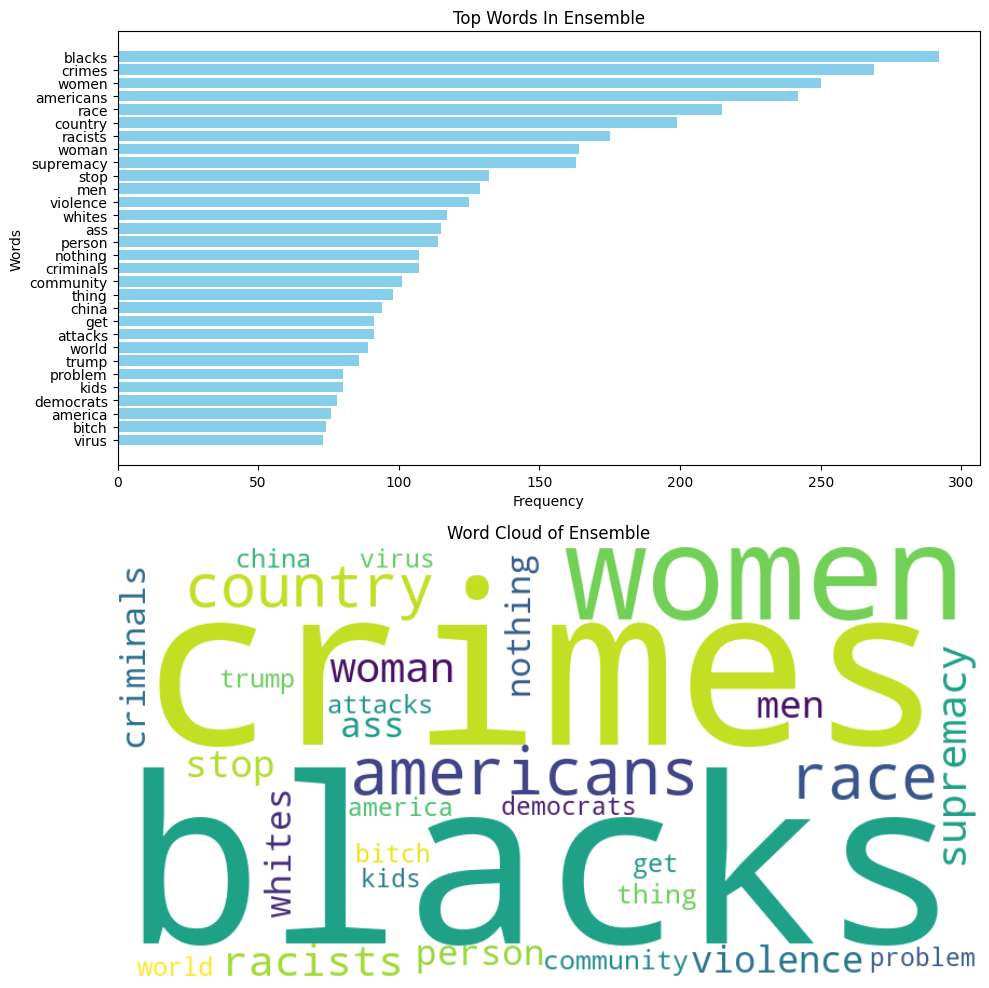

In [21]:
top_words = get_top_words_int(df[df["ensemble"] > 0.9]["clean"].astype("str").tolist(), n=30)
plot_top_words_and_wordcloud(top_words, "Ensemble")

In [64]:
dataset = "ethos"
print("Average Engagement of Hate Class: " + str(df[df[dataset] > 0.5]["engagement"].mean()))
print("Average Engagement of Non-Hate Class: " + str(df[df[dataset] < 0.5]["engagement"].mean()))

Average Engagement of Hate Class: 109.64842083883416
Average Engagement of Non-Hate Class: 202.8862253417485


In [65]:
dataset = "davidson"
print("Average Engagement of Hate Class: " + str(df[df[dataset] > 0.5]["engagement"].mean()))
print("Average Engagement of Non-Hate Class: " + str(df[df[dataset] < 0.5]["engagement"].mean()))

Average Engagement of Hate Class: 377.18892711917425
Average Engagement of Non-Hate Class: 194.83801107383465


In [27]:
dataset = "hateval2"
print("Average Engagement of Hate Class: " + str(df[df[dataset] > 0.8]["engagement"].mean()))
print("Average Engagement of Non-Hate Class: " + str(df[df[dataset] < 0.5]["engagement"].mean()))

Average Engagement of Hate Class: 71.50846900180892
Average Engagement of Non-Hate Class: 220.9625269258883


In [67]:
dataset = "qian"
print("Average Engagement of Hate Class: " + str(df[df[dataset] > 0.5]["engagement"].mean()))
print("Average Engagement of Non-Hate Class: " + str(df[df[dataset] < 0.5]["engagement"].mean()))

Average Engagement of Hate Class: 61.79772866789441
Average Engagement of Non-Hate Class: 205.49396281501433


In [68]:
dataset = "jigsaw"
print("Average Engagement of Hate Class: " + str(df[df[dataset] > 0.5]["engagement"].mean()))
print("Average Engagement of Non-Hate Class: " + str(df[df[dataset] < 0.5]["engagement"].mean()))

Average Engagement of Hate Class: 64.10623642569035
Average Engagement of Non-Hate Class: 210.62302153206923


In [28]:
dataset = "ensemble"
print("Average Engagement of Hate Class: " + str(df[df[dataset] > 0.9]["engagement"].mean()))
print("Average Engagement of Non-Hate Class: " + str(df[df[dataset] < 0.5]["engagement"].mean()))

Average Engagement of Hate Class: 20.94724985920781
Average Engagement of Non-Hate Class: 234.37842217803953


In [29]:
# Calculate the correlation matrix
selected_columns = ['engagement', 'davidson', 'hateval', 'jigsaw', 'qian', 'ethos', 'ensemble']
selected_df = df[selected_columns]

correlation_matrix = selected_df.corr()

# Print the correlation matrix
print("Correlation Matrix between columns A, B, and D:")
print(correlation_matrix["engagement"])

Correlation Matrix between columns A, B, and D:
engagement    1.000000
davidson      0.000855
hateval      -0.001387
jigsaw       -0.002880
qian         -0.002176
ethos        -0.001333
ensemble     -0.003556
Name: engagement, dtype: float64
